In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib.colors import ListedColormap

# Set visual style
sns.set(style="whitegrid")
print("Libraries Imported Successfully!")

Libraries Imported Successfully!


In [2]:
# Importing the Dataset and Cleaning
df = pd.read_csv('breast_cancer_bd.csv')

# 1. Drop ID column
if 'Sample code number' in df.columns:
    df = df.drop('Sample code number', axis=1)

# 2. Robust Missing Value Handling
df = df.replace('?', np.nan)
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Drop missing rows
df = df.dropna()

# 4. Separate Features (X) and Target (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# 5. Standardize Targets: 2 -> 0, 4 -> 1
y = np.where(y == 2, 0, 1)

print("Data Cleaned and Processed.")
print(f"Features Matrix Shape: {X.shape}")

Data Cleaned and Processed.
Features Matrix Shape: (683, 9)


In [3]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(f"Training Samples: {len(X_train)}")
print(f"Testing Samples: {len(X_test)}")

Training Samples: 478
Testing Samples: 205


In [4]:
# Training the Logistic Regression model
classifier = LogisticRegression(random_state=42, max_iter=1000)
classifier.fit(X_train, y_train)

print("Model Trained Successfully.")

Model Trained Successfully.


--- FINAL EVALUATION ON TEST SET ---
Accuracy Score: 96.10%

--- CONFUSION MATRIX ---
[[128   5]
 [  3  69]]

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       133
           1       0.93      0.96      0.95        72

    accuracy                           0.96       205
   macro avg       0.95      0.96      0.96       205
weighted avg       0.96      0.96      0.96       205



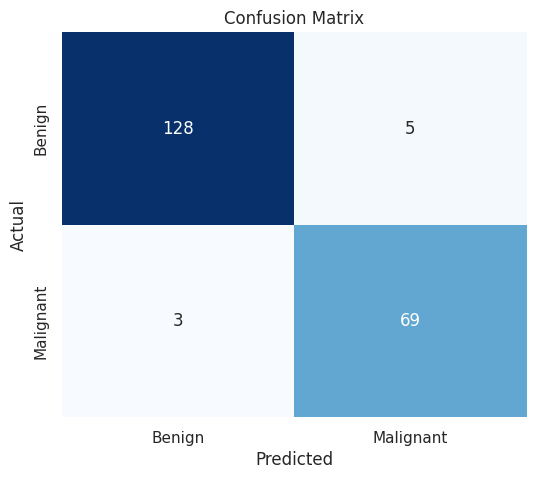

In [5]:
# Predicting and Evaluating
y_pred = classifier.predict(X_test)

print("--- FINAL EVALUATION ON TEST SET ---")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")

print("\n--- CONFUSION MATRIX ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

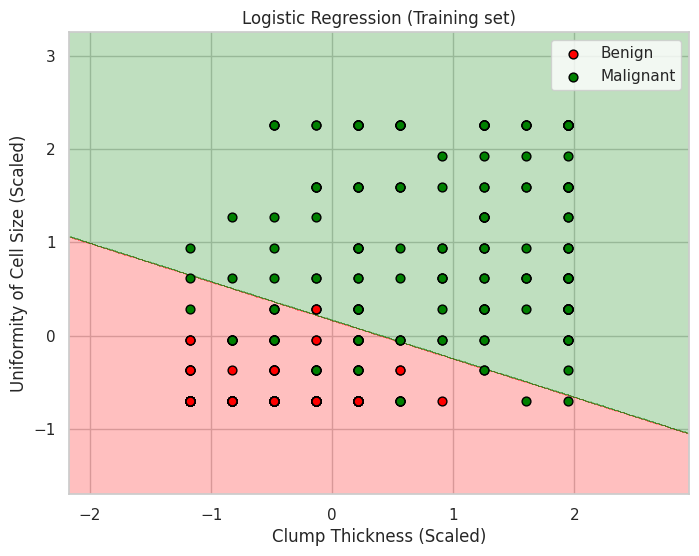

In [6]:
# Visualising the Test set results
def visualize_boundary(X_set, y_set, title):
    X_vis = X_set[:, [0, 1]] 
    clf_vis = LogisticRegression(random_state=42)
    clf_vis.fit(X_vis, y_set)
    X1, X2 = np.meshgrid(np.arange(start=X_vis[:, 0].min() - 1, stop=X_vis[:, 0].max() + 1, step=0.01),
                         np.arange(start=X_vis[:, 1].min() - 1, stop=X_vis[:, 1].max() + 1, step=0.01))
    plt.figure(figsize=(8, 6))
    plt.contourf(X1, X2, clf_vis.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.25, cmap=ListedColormap(('red', 'green')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_vis[y_set == j, 0], X_vis[y_set == j, 1],
                    color=ListedColormap(('red', 'green'))(i), 
                    label=('Benign' if j==0 else 'Malignant'),
                    edgecolors='black', s=40)
    plt.title(title)
    plt.xlabel('Clump Thickness (Scaled)')
    plt.ylabel('Uniformity of Cell Size (Scaled)')
    plt.legend()
    plt.show()
visualize_boundary(X_train, y_train, 'Logistic Regression (Training set)')



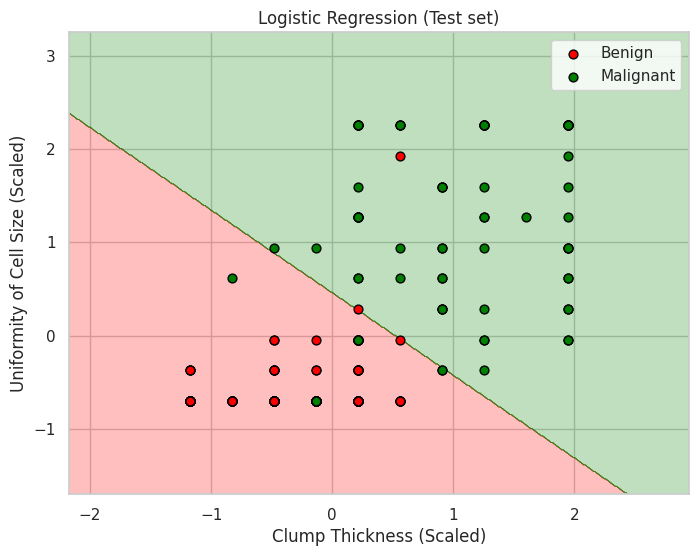

In [7]:
#  Visualising the Test set results
visualize_boundary(X_test, y_test, 'Logistic Regression (Test set)')